# Table of Contents

1. [Problem Statement](##Problem-Statement)
2. [Importing & Data Wrangling](#Importing-&-Data-Wrangling)
3. [EDA](#Exploratory-Data-Analysis)
4. [Creating Baseline Model](#Creating-Baseline-Model)
5. [Improving Our Model](#Improving-Our-Model)
6. [Training & Fitting Model](#Training-&-Fitting-Our-Model)
7. [Conclusion](#Conclusion)

## Problem Statement
A client has tasked our team to assist them in making better decisions in investing in potential hit games by assessing the description of the games.  

To assist the client in making better investment decisions in potential hit games, we can implement a text classification model to analyze the descriptions of the games. The model can predict whether a game will be a hit or not based on the description provided by the client.

The first step in the process is to collect a large dataset of game descriptions and their reviews score from Steam(a popular gaming platform). This data will be used to train and evaluate the model.

Next, we will pre-process the description text to clean and normalize the data. This includes removing stop words, punctuation, and converting all text to lowercase. Additionally, we can perform lemmatization or stemming to reduce words to their base form and reduce the number of unique tokens in the dataset.

Once the text data has been pre-processed, we can use techniques like count vectorizing, bag-of-words or TF-IDF to convert the text data into numerical feature vectors. These feature vectors can then be used as input to the machine learning model.

In this case, a suitable machine learning algorithm for the task might be a Naive Bayes classifier or a Random Forest classifier. We will train the model on the pre-processed data and evaluate its performance on a held-out validation set. If the performance is not up to the desired standards, we can make adjustments to the pre-processing steps or the model architecture to improve performance.

Finally, the trained model can be used to predict the success of new games based on their descriptions. The client can use this information to make informed investment decisions.

Overall, by using text classification, we should be able to provide valuable insights to the client on the potential success of new games and help them make better investment decisions.


### Data Dictionary


|Feature|Description|
|---|---|
|title|name of game|
|link|game url|
|r_date|game release date|
|price|price of game|
|description|description of game|
|reviews|reviews summary consolidated by Steam|
|tagged| users-defined tags of games|

# Importing & Data Wrangling

In [1]:
### importing libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import tqdm

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer



In [2]:
### load dataset

master_df = pd.read_csv('dataset/master_df3.csv')
master_df

,title,link,r_date,price,description,reviews,tagged
0,Persona 3 Portable,https://store.steampowered.com/app/1809700/Per...,"18 Jan, 2023",CDN$ 27.99,"About This GameExperience the iconic, critical...",All Reviews:Mostly Positive(771)- 74% of the 7...,"RPG, Story Rich, Anime, Turn-Based Combat, JRP..."
1,Boing,https://store.steampowered.com/app/2180390/Boi...,"18 Jan, 2023",-20%\n\n\nCDN$ 10.49CDN$ 8.39,About This GameLong ago in the deepest and dar...,All Reviews:1 user reviews- Need more user rev...,"Casual, Action, Arcade, Atmospheric, 2D, Singl..."
2,Fraymakers,https://store.steampowered.com/app/1420350/Fra...,"18 Jan, 2023",CDN$ 22.79,About This GameWhat is Fraymakers?Fraymakers i...,All Reviews:Mixed(214)- 68% of the 214 user re...,"Indie, Fighting, 2D Fighter, Multiplayer, Acti..."
3,【VR】Physical Exam / イタズラ身体測定,https://store.steampowered.com/app/2262110/VRP...,"18 Jan, 2023",-10%\n\n\nCDN$ 25.99CDN$ 23.39,About This GameThis game is for Meta Quest2 on...,All Reviews:1 user reviews- Need more user rev...,"Simulation, VR, Dating Sim, Cute, Immersive Si..."
4,FPS Seduce - Hentai,https://store.steampowered.com/app/1853780/FPS...,"18 Jan, 2023",-10%\n\n\nCDN$ 5.69CDN$ 5.12,About This GameMake love to many beautiful ani...,All Reviews:2 user reviews- Need more user rev...,"Nudity, Sexual Content, Hentai, Romance, Anime..."
...,...,...,...,...,...,...,...
49995,Stay! Stay! Democratic People's Republic of Ko...,https://store.steampowered.com/app/512060/Stay...,"12 May, 2017",CDN$ 10.99,"About This GameSTORY The year is 2021, America...",All Reviews:Very Positive(480)- 93% of the 480...,"Memes, Anime, Visual Novel, Nudity, Sexual Con..."
49996,"Seed Of The Arcane , Episode 1",https://store.steampowered.com/app/601020/Seed...,"12 May, 2017",CDN$ 16.99,About This Game****This game is on Alpha test ...,All Reviews:Mostly Negative(29)- 27% of the 29...,"RPG, Nudity, Adventure, Indie, Early Access, G..."
49997,Dark Mechanism - Virtual reality,https://store.steampowered.com/app/600580/Dark...,"12 May, 2017",CDN$ 2.19,"About This GameIn this VR exclusive game, trav...",All Reviews:2 user reviews- Need more user rev...,"Casual, VR"
49998,Solitaire Club,https://store.steampowered.com/app/630470/Soli...,"11 May, 2017",CDN$ 5.69,About This GameExperience real casino flair on...,All Reviews:Mixed(11)- 63% of the 11 user revi...,"Casual, Solitaire, Card Game, Puzzle, Strategy..."


In [3]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        49999 non-null  object
 1   link         50000 non-null  object
 2   r_date       49999 non-null  object
 3   price        49734 non-null  object
 4   description  49929 non-null  object
 5   reviews      49934 non-null  object
 6   tagged       49978 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


In [4]:
### adjusting column header space

_ls = master_df.columns
new_col = []
for i in _ls:
    new_col.append(i.strip())

master_df.columns = new_col

In [5]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        49999 non-null  object
 1   link         50000 non-null  object
 2   r_date       49999 non-null  object
 3   price        49734 non-null  object
 4   description  49929 non-null  object
 5   reviews      49934 non-null  object
 6   tagged       49978 non-null  object
dtypes: object(7)
memory usage: 2.7+ MB


There are some missing values in our dataset in the columns for price, description, reviews and tagged. 

In [6]:
missing_vals = master_df.isnull().sum()
missing_vals

title            1
link             0
r_date           1
price          266
description     71
reviews         66
tagged          22
dtype: int64

The number of missing values in each columns is negligible as our dataset has 50k entries, so it should be fine to drop those entries.  

In [7]:
def extract_int(string):
    match = re.search(r'(app|sub)/(\d+)', string)
    if match:
        return int(match.group(2))
    else:
        return None

master_df['game_id'] = master_df['link'].apply(extract_int)

In [8]:
### creating a subset after dropping rows with missing values
### dropping link column as well

df_1 = master_df.dropna()
df_1.drop(columns='link', inplace=True)
df_1

C:\Users\benyo\AppData\Local\Temp\ipykernel_24664\1522254940.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns='link', inplace=True)


,title,r_date,price,description,reviews,tagged,game_id
0,Persona 3 Portable,"18 Jan, 2023",CDN$ 27.99,"About This GameExperience the iconic, critical...",All Reviews:Mostly Positive(771)- 74% of the 7...,"RPG, Story Rich, Anime, Turn-Based Combat, JRP...",1809700
1,Boing,"18 Jan, 2023",-20%\n\n\nCDN$ 10.49CDN$ 8.39,About This GameLong ago in the deepest and dar...,All Reviews:1 user reviews- Need more user rev...,"Casual, Action, Arcade, Atmospheric, 2D, Singl...",2180390
2,Fraymakers,"18 Jan, 2023",CDN$ 22.79,About This GameWhat is Fraymakers?Fraymakers i...,All Reviews:Mixed(214)- 68% of the 214 user re...,"Indie, Fighting, 2D Fighter, Multiplayer, Acti...",1420350
3,【VR】Physical Exam / イタズラ身体測定,"18 Jan, 2023",-10%\n\n\nCDN$ 25.99CDN$ 23.39,About This GameThis game is for Meta Quest2 on...,All Reviews:1 user reviews- Need more user rev...,"Simulation, VR, Dating Sim, Cute, Immersive Si...",2262110
4,FPS Seduce - Hentai,"18 Jan, 2023",-10%\n\n\nCDN$ 5.69CDN$ 5.12,About This GameMake love to many beautiful ani...,All Reviews:2 user reviews- Need more user rev...,"Nudity, Sexual Content, Hentai, Romance, Anime...",1853780
...,...,...,...,...,...,...,...
49995,Stay! Stay! Democratic People's Republic of Ko...,"12 May, 2017",CDN$ 10.99,"About This GameSTORY The year is 2021, America...",All Reviews:Very Positive(480)- 93% of the 480...,"Memes, Anime, Visual Novel, Nudity, Sexual Con...",512060
49996,"Seed Of The Arcane , Episode 1","12 May, 2017",CDN$ 16.99,About This Game****This game is on Alpha test ...,All Reviews:Mostly Negative(29)- 27% of the 29...,"RPG, Nudity, Adventure, Indie, Early Access, G...",601020
49997,Dark Mechanism - Virtual reality,"12 May, 2017",CDN$ 2.19,"About This GameIn this VR exclusive game, trav...",All Reviews:2 user reviews- Need more user rev...,"Casual, VR",600580
49998,Solitaire Club,"11 May, 2017",CDN$ 5.69,About This GameExperience real casino flair on...,All Reviews:Mixed(11)- 63% of the 11 user revi...,"Casual, Solitaire, Card Game, Puzzle, Strategy...",630470


In [9]:
### converting all characters to lowercase for standardization

df_1 = df_1.apply(lambda x: x.str.lower() if x.dtype == 'object' else x)


In [10]:
df_1

,title,r_date,price,description,reviews,tagged,game_id
0,persona 3 portable,"18 jan, 2023",cdn$ 27.99,"about this gameexperience the iconic, critical...",all reviews:mostly positive(771)- 74% of the 7...,"rpg, story rich, anime, turn-based combat, jrp...",1809700
1,boing,"18 jan, 2023",-20%\n\n\ncdn$ 10.49cdn$ 8.39,about this gamelong ago in the deepest and dar...,all reviews:1 user reviews- need more user rev...,"casual, action, arcade, atmospheric, 2d, singl...",2180390
2,fraymakers,"18 jan, 2023",cdn$ 22.79,about this gamewhat is fraymakers?fraymakers i...,all reviews:mixed(214)- 68% of the 214 user re...,"indie, fighting, 2d fighter, multiplayer, acti...",1420350
3,【vr】physical exam / イタズラ身体測定,"18 jan, 2023",-10%\n\n\ncdn$ 25.99cdn$ 23.39,about this gamethis game is for meta quest2 on...,all reviews:1 user reviews- need more user rev...,"simulation, vr, dating sim, cute, immersive si...",2262110
4,fps seduce - hentai,"18 jan, 2023",-10%\n\n\ncdn$ 5.69cdn$ 5.12,about this gamemake love to many beautiful ani...,all reviews:2 user reviews- need more user rev...,"nudity, sexual content, hentai, romance, anime...",1853780
...,...,...,...,...,...,...,...
49995,stay! stay! democratic people's republic of ko...,"12 may, 2017",cdn$ 10.99,"about this gamestory the year is 2021, america...",all reviews:very positive(480)- 93% of the 480...,"memes, anime, visual novel, nudity, sexual con...",512060
49996,"seed of the arcane , episode 1","12 may, 2017",cdn$ 16.99,about this game****this game is on alpha test ...,all reviews:mostly negative(29)- 27% of the 29...,"rpg, nudity, adventure, indie, early access, g...",601020
49997,dark mechanism - virtual reality,"12 may, 2017",cdn$ 2.19,"about this gamein this vr exclusive game, trav...",all reviews:2 user reviews- need more user rev...,"casual, vr",600580
49998,solitaire club,"11 may, 2017",cdn$ 5.69,about this gameexperience real casino flair on...,all reviews:mixed(11)- 63% of the 11 user revi...,"casual, solitaire, card game, puzzle, strategy...",630470


In [11]:
### removing the header of the description of the game 'about this game'

df_1['description'] = df_1['description'].str.replace(r'about this game','')
df_1

,title,r_date,price,description,reviews,tagged,game_id
0,persona 3 portable,"18 jan, 2023",cdn$ 27.99,"experience the iconic, critically acclaimed rp...",all reviews:mostly positive(771)- 74% of the 7...,"rpg, story rich, anime, turn-based combat, jrp...",1809700
1,boing,"18 jan, 2023",-20%\n\n\ncdn$ 10.49cdn$ 8.39,"long ago in the deepest and darkest of space, ...",all reviews:1 user reviews- need more user rev...,"casual, action, arcade, atmospheric, 2d, singl...",2180390
2,fraymakers,"18 jan, 2023",cdn$ 22.79,what is fraymakers?fraymakers is the ultimate ...,all reviews:mixed(214)- 68% of the 214 user re...,"indie, fighting, 2d fighter, multiplayer, acti...",1420350
3,【vr】physical exam / イタズラ身体測定,"18 jan, 2023",-10%\n\n\ncdn$ 25.99cdn$ 23.39,this game is for meta quest2 only. if it does ...,all reviews:1 user reviews- need more user rev...,"simulation, vr, dating sim, cute, immersive si...",2262110
4,fps seduce - hentai,"18 jan, 2023",-10%\n\n\ncdn$ 5.69cdn$ 5.12,make love to many beautiful anime girls in thi...,all reviews:2 user reviews- need more user rev...,"nudity, sexual content, hentai, romance, anime...",1853780
...,...,...,...,...,...,...,...
49995,stay! stay! democratic people's republic of ko...,"12 may, 2017",cdn$ 10.99,"story the year is 2021, america is back in afg...",all reviews:very positive(480)- 93% of the 480...,"memes, anime, visual novel, nudity, sexual con...",512060
49996,"seed of the arcane , episode 1","12 may, 2017",cdn$ 16.99,****this game is on alpha test - please read t...,all reviews:mostly negative(29)- 27% of the 29...,"rpg, nudity, adventure, indie, early access, g...",601020
49997,dark mechanism - virtual reality,"12 may, 2017",cdn$ 2.19,"in this vr exclusive game, travel through cloc...",all reviews:2 user reviews- need more user rev...,"casual, vr",600580
49998,solitaire club,"11 may, 2017",cdn$ 5.69,experience real casino flair on your pc with s...,all reviews:mixed(11)- 63% of the 11 user revi...,"casual, solitaire, card game, puzzle, strategy...",630470


In [12]:
### splitting the review column to the reviews overview, review types, and review statistics 

df_1[['reviews','review_type','review_stats']] = df_1['reviews'].str.split(':|-', n=2, expand=True)
df_1[['positive_percentage','total_reviews']] = df_1['review_stats'].str.extract(r'(\d+%)\s+of\s+the\s+(\d+)\s+user\s+reviews', expand=True)

df_1 = df_1.reindex(columns =['title','r_date',
                       'price','description','reviews',
                       'review_type','review_stats','positive_percentage',
                              'total_reviews','tagged','game_id'])
df_1.drop(columns='reviews', inplace=True)
df_1.head()

,title,r_date,price,description,review_type,review_stats,positive_percentage,total_reviews,tagged,game_id
0,persona 3 portable,"18 jan, 2023",cdn$ 27.99,"experience the iconic, critically acclaimed rp...",mostly positive(771),74% of the 771 user reviews for this game are...,74%,771,"rpg, story rich, anime, turn-based combat, jrp...",1809700
1,boing,"18 jan, 2023",-20%\n\n\ncdn$ 10.49cdn$ 8.39,"long ago in the deepest and darkest of space, ...",1 user reviews,need more user reviews to generate a score,NaN,NaN,"casual, action, arcade, atmospheric, 2d, singl...",2180390
2,fraymakers,"18 jan, 2023",cdn$ 22.79,what is fraymakers?fraymakers is the ultimate ...,mixed(214),68% of the 214 user reviews for this game are...,68%,214,"indie, fighting, 2d fighter, multiplayer, acti...",1420350
3,【vr】physical exam / イタズラ身体測定,"18 jan, 2023",-10%\n\n\ncdn$ 25.99cdn$ 23.39,this game is for meta quest2 only. if it does ...,1 user reviews,need more user reviews to generate a score,NaN,NaN,"simulation, vr, dating sim, cute, immersive si...",2262110
4,fps seduce - hentai,"18 jan, 2023",-10%\n\n\ncdn$ 5.69cdn$ 5.12,make love to many beautiful anime girls in thi...,2 user reviews,need more user reviews to generate a score,NaN,NaN,"nudity, sexual content, hentai, romance, anime...",1853780


In [13]:
df_1['r_date'] = pd.to_datetime(df_1['r_date'])

In [14]:
def convert(string):
    match = re.search(r'\$\s*([\d.]+)', string)
    if match:
        return float(match.group(1))
    elif 'free' in string:
        return 0
    else:
        return None

df_1['price'] = df_1['price'].apply(convert)

In [15]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49656 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   title                49656 non-null  object        
 1   r_date               49656 non-null  datetime64[ns]
 2   price                49656 non-null  float64       
 3   description          49656 non-null  object        
 4   review_type          49656 non-null  object        
 5   review_stats         45488 non-null  object        
 6   positive_percentage  26911 non-null  object        
 7   total_reviews        26911 non-null  object        
 8   tagged               49656 non-null  object        
 9   game_id              49656 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 4.2+ MB


In [16]:
### Checking to see if there are any duplicated entries in our dataset

df_1['game_id'].duplicated().value_counts()

False    49655
True         1
Name: game_id, dtype: int64

In [17]:
df_1.drop_duplicates(subset=['game_id'], inplace=True)

In [18]:
df_1['game_id'].duplicated().value_counts()

False    49655
Name: game_id, dtype: int64

In [19]:
df2 = df_1.dropna()
df2

,title,r_date,price,description,review_type,review_stats,positive_percentage,total_reviews,tagged,game_id
0,persona 3 portable,2023-01-18,27.99,"experience the iconic, critically acclaimed rp...",mostly positive(771),74% of the 771 user reviews for this game are...,74%,771,"rpg, story rich, anime, turn-based combat, jrp...",1809700
2,fraymakers,2023-01-18,22.79,what is fraymakers?fraymakers is the ultimate ...,mixed(214),68% of the 214 user reviews for this game are...,68%,214,"indie, fighting, 2d fighter, multiplayer, acti...",1420350
7,osiris: new dawn,2023-01-18,39.99,"inspired by the edgier side of sci fi, osiris:...",mostly negative(127),31% of the 127 user reviews in the last 30 da...,31%,127,"open world survival craft, horror, survival, s...",402710
8,lake haven - chrysalis,2023-01-18,3.89,"on october 7th, at 9 pm the kansas police depa...",positive(27),100% of the 27 user reviews for this game are...,100%,27,"third person, exploration, singleplayer, adven...",1696960
13,predictors,2023-01-18,3.89,turn-based roguelikego solo or invite up to th...,positive(20),95% of the 20 user reviews for this game are ...,95%,20,"roguelike, roguelite, turn-based, online co-op...",2149330
...,...,...,...,...,...,...,...,...,...,...
49993,domain defense vr,2017-05-12,8.99,domain defense vr is a stand alone game that h...,positive(15),80% of the 15 user reviews for this game are ...,80%,15,"strategy, indie, casual, vr",455190
49994,void rangers,2017-05-12,12.99,"quotes from reviews""if you wondered what space...",positive(35),80% of the 35 user reviews for this game are ...,80%,35,"action, indie, vr, shooter, loot",529360
49995,stay! stay! democratic people's republic of ko...,2017-05-12,10.99,"story the year is 2021, america is back in afg...",very positive(480),93% of the 480 user reviews for this game are...,93%,480,"memes, anime, visual novel, nudity, sexual con...",512060
49996,"seed of the arcane , episode 1",2017-05-12,16.99,****this game is on alpha test - please read t...,mostly negative(29),27% of the 29 user reviews for this game are ...,27%,29,"rpg, nudity, adventure, indie, early access, g...",601020


In [20]:
# Converting dtypes of total reviews and positive percentage to int for later usage

df2['total_reviews']=df2['total_reviews'].astype(int)
df2['positive_percentage'] = df2['positive_percentage'].str.replace('%','').astype(int)

C:\Users\benyo\AppData\Local\Temp\ipykernel_24664\1302660438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_reviews']=df2['total_reviews'].astype(int)
C:\Users\benyo\AppData\Local\Temp\ipykernel_24664\1302660438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['positive_percentage'] = df2['positive_percentage'].str.replace('%','').astype(int)


# Exploratory Data Analysis

We will perform some EDA to determine the parameters of how we can classify a game to be successful or not successful based on their reviews characteristics. <br><br>
*Point to take note: $0 priced games in our case refer to games that are "Free-to-Play". Sometimes these games include in-game purchases.**

In [21]:
df2.describe()

,price,positive_percentage,total_reviews,game_id
count,26910.000000,26910.000000,26910.000000,2.691000e+04
mean,10.508753,77.282423,83.613973,1.223329e+06
std,12.736401,17.978951,133.495339,4.602317e+05
min,0.000000,0.000000,10.000000,1.313000e+03
25%,1.190000,67.000000,17.000000,8.393025e+05
50%,5.690000,81.000000,32.000000,1.180530e+06
75%,15.490000,91.000000,84.000000,1.577220e+06
max,259.990000,100.000000,996.000000,2.263390e+06


The median percentage for positive reviews is at 81% with the upper percentile at 91%. We can take this into account when determining our threshold for our measure of success for a game. 

C:\Users\benyo\AppData\Local\Temp\ipykernel_24664\3040343475.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cmap='coolwarm', annot=True)


<AxesSubplot: >

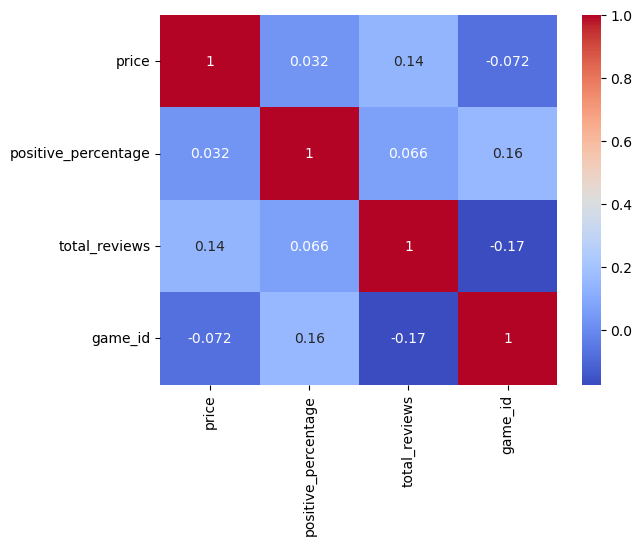

In [22]:
sns.heatmap(df2.corr(), cmap='coolwarm', annot=True)

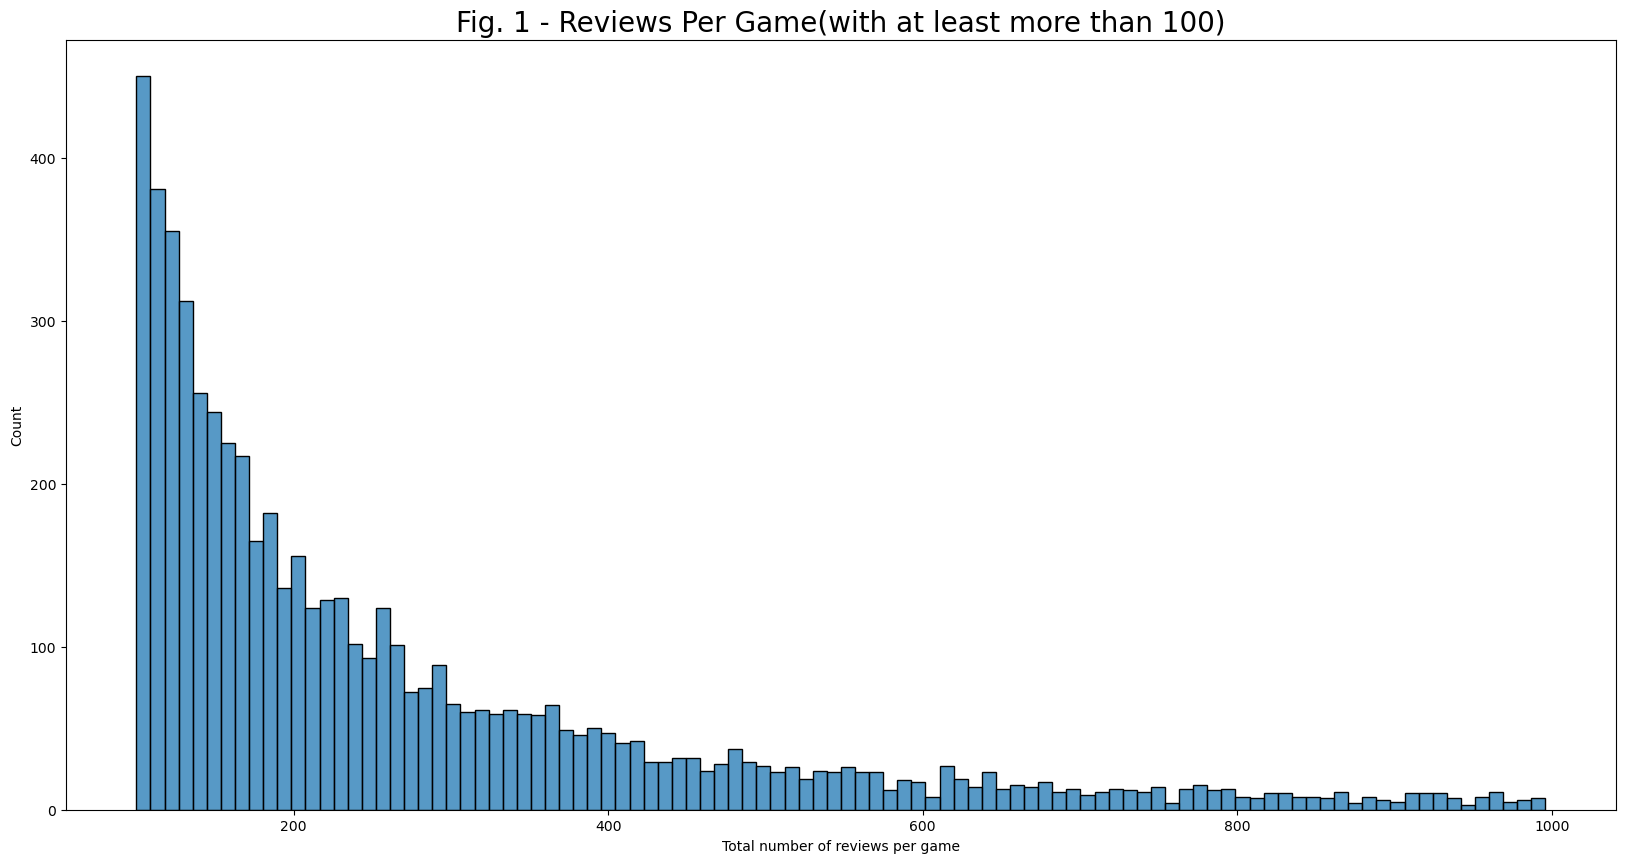

In [23]:
plt.figure(figsize=(20,10))
sns.histplot(data = df2[df2['total_reviews']>=100], x='total_reviews', bins=100)
plt.title('Fig. 1 - Reviews Per Game(with at least more than 100)', fontdict={'fontsize':20})
plt.xlabel('Total number of reviews per game');

Looking at Fig 1, there are less number of games as the number of reviews per game increase. That makes sense, as from our domain understanding in gaming, there will be more reviews for more popular games due to the amount of people playing that particular game.  

In [24]:
positive_vals = df2[df2['total_reviews']>=100]['positive_percentage'].unique()

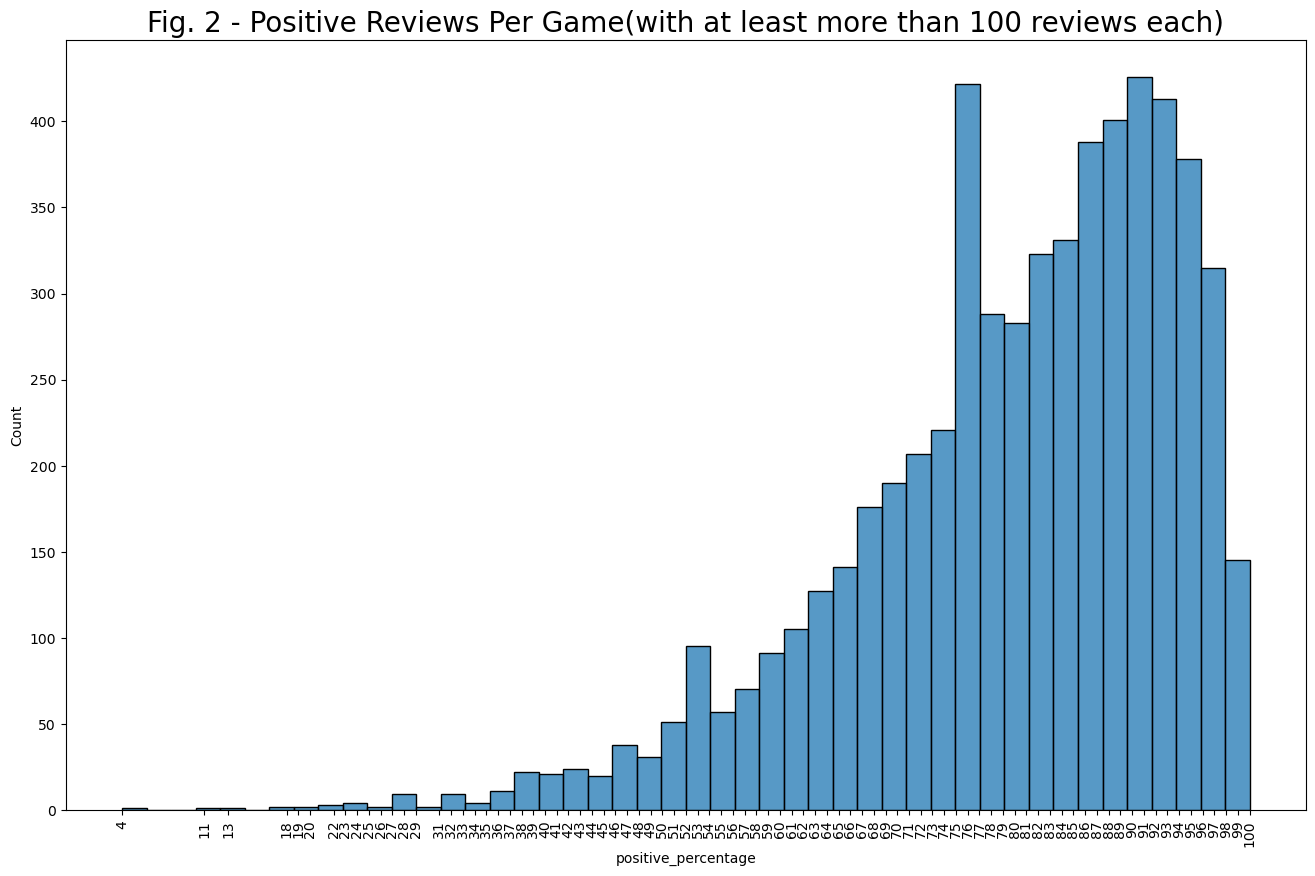

In [25]:
plt.figure(figsize=(16,10))
sns.histplot(data = df2[df2['total_reviews']>=100], x='positive_percentage')
plt.title('Fig. 2 - Positive Reviews Per Game(with at least more than 100 reviews each)', fontdict={'fontsize':20})
plt.xticks(ticks = positive_vals, rotation = 90);

In Fig.2, there is a sharp increase in the counts of 75% positive reviews. Perhaps we can consider that as our threshold to measure success for a game. *We only considered games with at least 100 reviews or more.*

In [26]:
df2_filtered = df2[df2['total_reviews'] >= 100]
df2_filtered['total_review_bins'] =pd.cut(df2_filtered["total_reviews"],
                                          bins=[100,200,300,400,500,600,700,800,900,1000],
                                         labels=['0-100',"100-200", "200-300", "300-400", "400-500",
                                                 '500-600','600-700','800-900','900-1000']) 
                                          


C:\Users\benyo\AppData\Local\Temp\ipykernel_24664\3876771649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['total_review_bins'] =pd.cut(df2_filtered["total_reviews"],


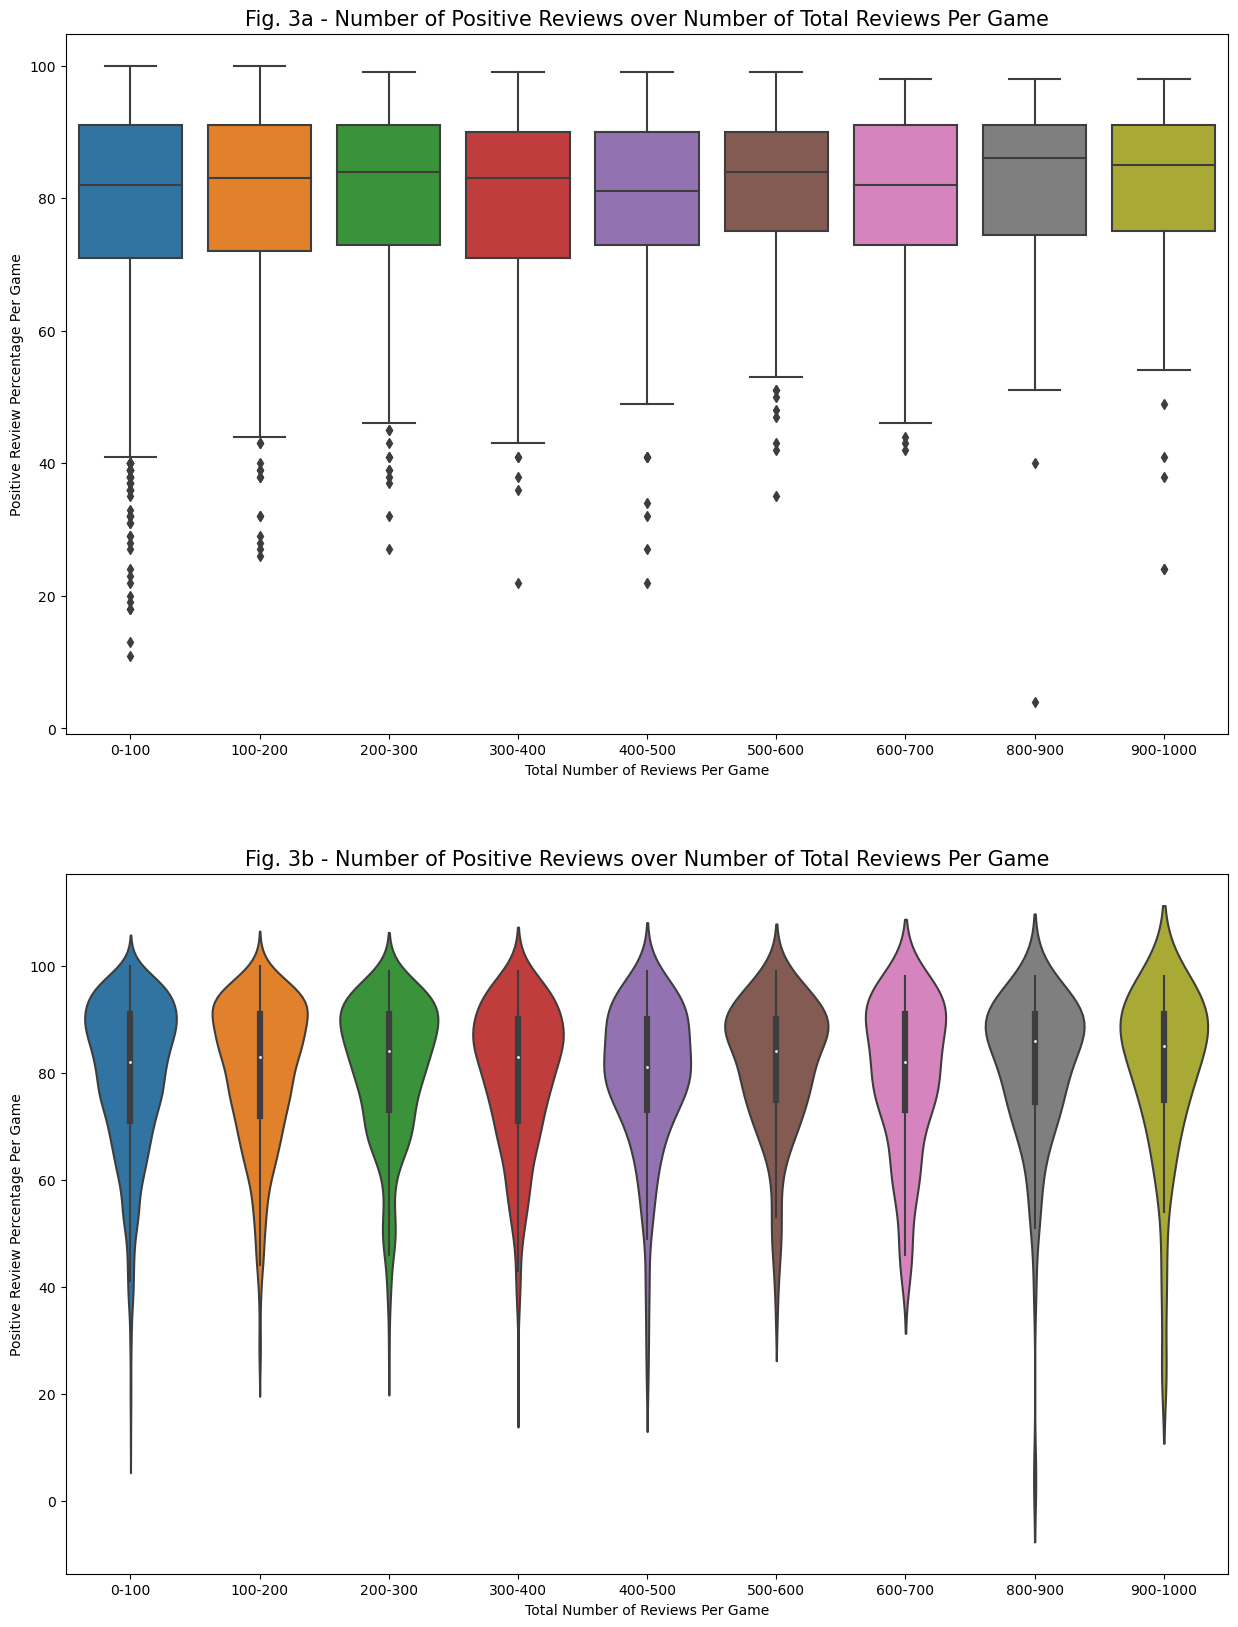

In [27]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
sns.boxplot(df2_filtered, x='total_review_bins', y = 'positive_percentage')
plt.title('Fig. 3a - Number of Positive Reviews over Number of Total Reviews Per Game', fontdict={'fontsize':15})
plt.ylabel('Positive Review Percentage Per Game')
plt.xlabel('Total Number of Reviews Per Game')

plt.subplot(2,1,2)
sns.violinplot(df2_filtered, x='total_review_bins', y = 'positive_percentage')
plt.title('Fig. 3b - Number of Positive Reviews over Number of Total Reviews Per Game', fontdict={'fontsize':15})
plt.ylabel('Positive Review Percentage Per Game')
plt.xlabel('Total Number of Reviews Per Game');

We have grouped the games according to their number of reviews given by the 100s. <br>
We see from Fig. 3a that there are usually more outliers in games that has lower number of reviews.
<br>
From Fig.3b, we also observe that there are substantial amount of games that have been positively reviewed in each group. 

Lets explore if there is any relation between released date, price and positive reviews.

In [28]:
### Creating new feature year and including into analysis 

df2['r_year'] = df2['r_date'].dt.year


C:\Users\benyo\AppData\Local\Temp\ipykernel_24664\1717121709.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['r_year'] = df2['r_date'].dt.year


In [29]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

### Define the independent and dependent variables

x = df2[['price','r_year','total_reviews']]
y = df2['positive_percentage']

### Scaling independent variables
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Add a constant to the independent variable
x = sm.add_constant(x)


# Fitting OLS model

model = sm.OLS(y,x).fit()

        
        

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     positive_percentage   R-squared:                       0.035
Model:                             OLS   Adj. R-squared:                  0.035
Method:                  Least Squares   F-statistic:                     326.3
Date:                 Tue, 31 Jan 2023   Prob (F-statistic):          4.08e-208
Time:                         00:12:10   Log-Likelihood:            -1.1545e+05
No. Observations:                26910   AIC:                         2.309e+05
Df Residuals:                    26906   BIC:                         2.309e+05
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3767.3405    132.539    -28.424      0.000   -4027.125   -3507.556
price             0.0075      0.009      0.874      0.382      -0.009       0.024
r_year            1.9029      0.066     28.999      0.000       1.774       2.031
total_reviews     0.0113      0.001     13.744      0.000       0.010       0.013
==============================================================================
Omnibus:                     3677.448   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5489.971
Skew:                          -1.006   Prob(JB):                         0.00
Kurtosis:                       3.922   Cond. No.                     2.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**The p-value of the game price is >0.05, which lets us safely assume that the price has no effect on the positivity of the reviews.** <br><br>

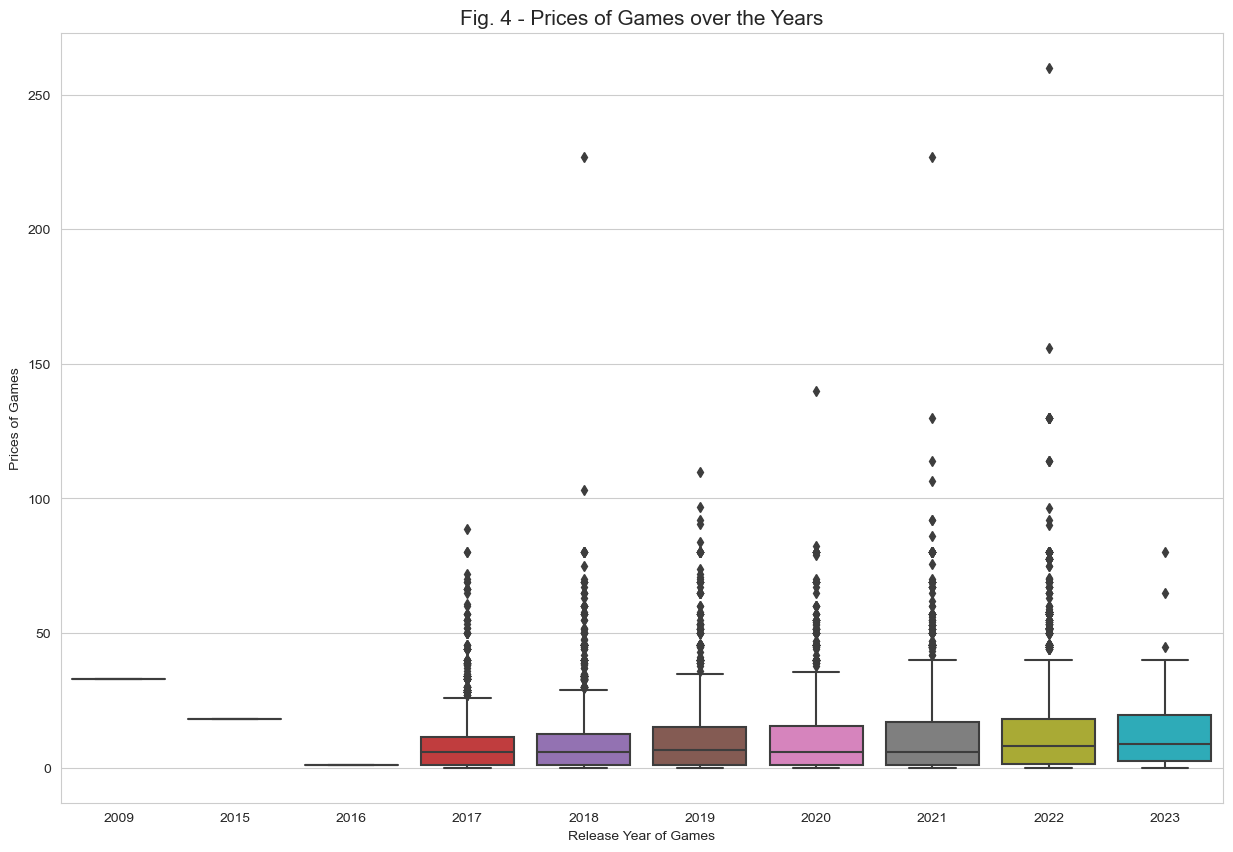

In [31]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
sns.boxplot(df2, x='r_year',y='price')
plt.title('Fig. 4 - Prices of Games over the Years', fontdict={'fontsize':15})
plt.xlabel('Release Year of Games')
plt.ylabel('Prices of Games');

Discounting the years 2016 and before as well as 2023(since we're only at the 1st month), the ceiling prices of games seems to have increase year on year. 

In [32]:
price_bins = pd.cut(df2['price'],bins=26, labels = list(range(0,251,10)))
price_bins

0        20
2        20
7        30
8         0
13        0
         ..
49993     0
49994    10
49995    10
49996    10
49998     0
Name: price, Length: 26910, dtype: category
Categories (26, int64): [0 < 10 < 20 < 30 ... 220 < 230 < 240 < 250]

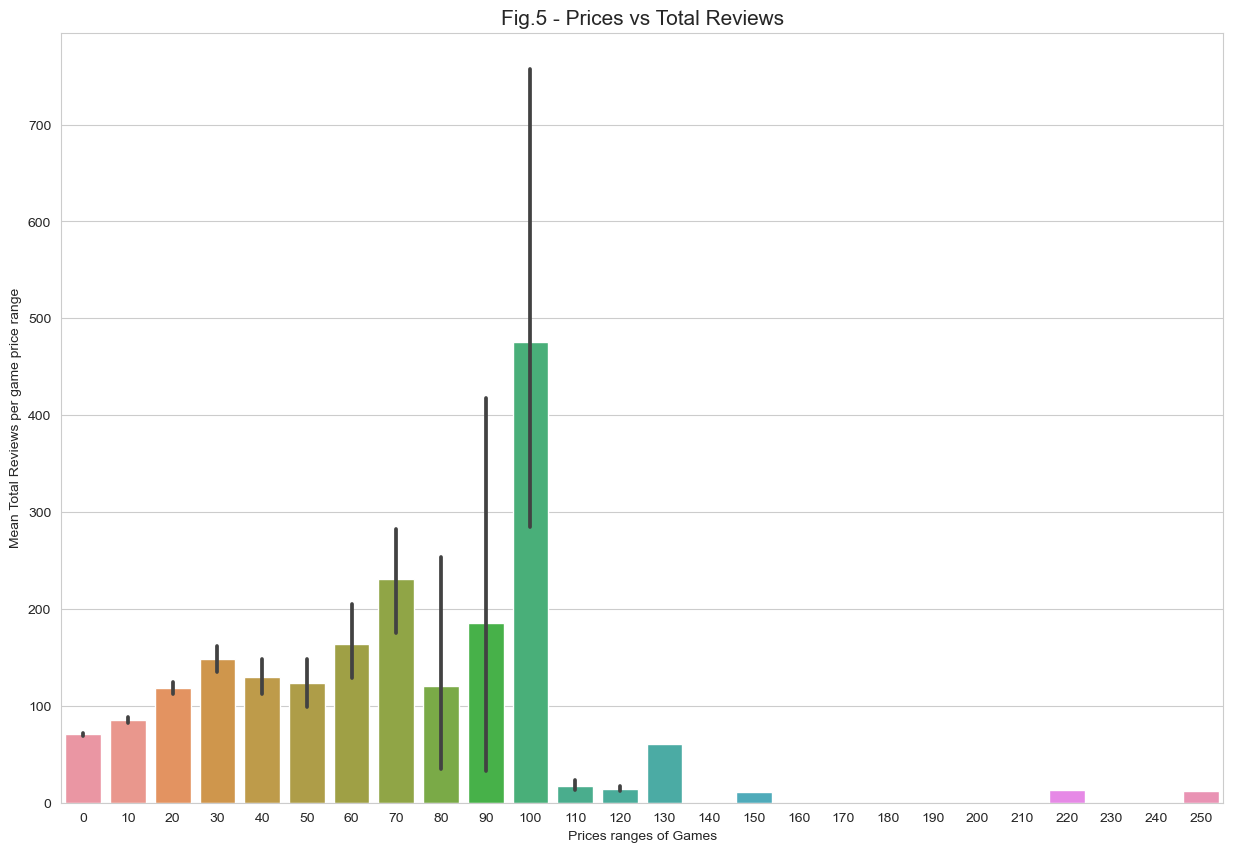

In [33]:
plt.figure(figsize=(15,10))
sns.barplot(df2, x=price_bins,y='total_reviews')
plt.title('Fig.5 - Prices vs Total Reviews', fontdict={'fontsize':15})
plt.xlabel('Prices ranges of Games')
plt.ylabel('Mean Total Reviews per game price range')
plt.xticks(rotation = 90, minor=True);


From Fig.5, we observe the following;<br>
1. There are at least 100 reviews for games that costs between \\$20 to \\$100, and the number of reviews falls drastically when a game costs more than \$100. It could be due to the high price that leads to less people buying the games, hence resulting in a minimal count of reviews.
2. There are most number of reviews in games that costs in the \\$70 range and \\$100 range(the most number of reviews).
<br><br>
Perhaps we should omit games that costs more than \\$100 for our model training later on.



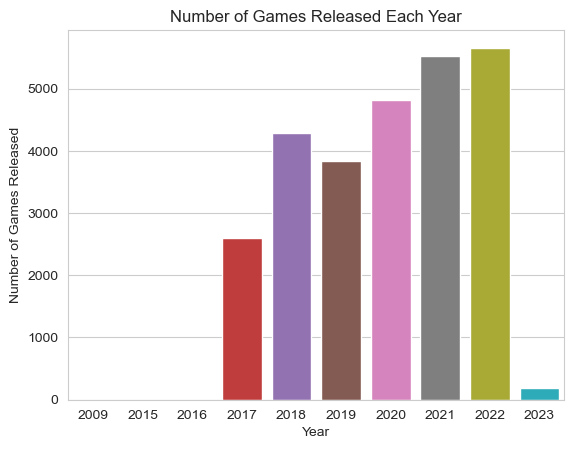

In [34]:
sns.countplot(x='r_year', data=df2)
plt.title('Number of Games Released Each Year')
plt.ylabel('Number of Games Released')
plt.xlabel('Year');

It seems like the gaming industry has been very active since 2017, or at least steam has been expanding and started to collect data since then. The number of games released per year has broken the 5000 mark in 2020. Perhaps this could be due to boost contributed by the effect of stay home period due to covid. <br> Some background details in the following links;<br>[WashingtonPost article 2020](https://www.washingtonpost.com/video-games/2020/05/12/video-game-industry-coronavirus/)<br> [Forbes article 2021 on how the gaming industry has leveled up during the pandemic](https://www.forbes.com/sites/forbestechcouncil/2021/06/17/how-the-gaming-industry-has-leveled-up-during-the-pandemic/?sh=30c984e7297c)

In [35]:
df2[df2['description']=='']

,title,r_date,price,description,review_type,review_stats,positive_percentage,total_reviews,tagged,game_id,r_year
5864,hard west 2,2022-08-05,33.99,,very positive(99),87% of the 99 user reviews in the last 30 day...,87,99,"turn-based strategy, western, turn-based tacti...",1282410,2022
9851,lawnarchy,2022-03-29,6.69,,positive(20),100% of the 20 user reviews for this game are...,100,20,"card game, hand-drawn, card battler, strategy,...",1796550,2022
12290,indirection,2022-01-09,3.39,,positive(10),100% of the 10 user reviews for this game are...,100,10,"platformer, puzzle, puzzle platformer, 2d plat...",1744450,2022
13589,star pilot,2021-11-25,0.00,,mixed(24),66% of the 24 user reviews for this game are ...,66,24,"pvp, action, multiplayer, space sim, shooter, ...",1564520,2021
13616,deeeer simulator: your average everyday deer game,2021-11-24,17.49,,very positive(59),94% of the 59 user reviews in the last 30 day...,94,59,"exploration, physics, sandbox, funny, third pe...",1018800,2021
13792,the jewel of monostructure,2021-11-18,6.69,,very positive(71),100% of the 71 user reviews for this game are...,100,71,"visual novel, dark fantasy, story rich, atmosp...",1644280,2021
14717,perfectly balanced,2021-10-22,1.19,,positive(25),88% of the 25 user reviews for this game are ...,88,25,"relaxing, logic, minimalist, puzzle, clicker, ...",1751780,2021
15037,elechead,2021-10-14,11.49,,very positive(36),97% of the 36 user reviews in the last 30 day...,97,36,"puzzle platformer, puzzle, platformer, linear,...",1456880,2021
15488,my fluffy life,2021-10-01,5.69,,very positive(66),86% of the 66 user reviews for this game are ...,86,66,"cute, relaxing, character customization, multi...",1686540,2021
15564,alphadeck,2021-09-30,0.00,,mixed(17),41% of the 17 user reviews for this game are ...,41,17,"card game, card battler, casual, deckbuilding,...",1558650,2021


### EDA Summary & Deciding on our measure of success 

From our EDA, we have gathered the following information;

1. It seems like the gaming industry has been very active since 2017, or at least Steam has been doing well and started to collect data since then. The number of games released per year has broken the 5000 mark in 2020. Perhaps this could be due to boost contributed by the effect of stay home period due to covid.
<br><br>
2. Discounting the years 2016 and before as well as 2023(since we're only at the 1st month), the ceiling prices of games seems to have increase year on year.
<br><br>
3. As the p-value of the game price is >0.05, it lets us safely assume that the price has no effect on the positivity of the reviews.
<br><br>
4. The median percentage for positive reviews is at 81% with the upper percentile at 91%. We can take this into account when determining our threshold for our measure of success for a game.
<br><br>
5. Looking at Fig 1, there are less number of games as the number of reviews per game increase. That makes sense, as from our domain understanding in gaming, there will be more reviews for more popular games due to the amount of people playing that particular game.
<br><br>
6. Followed by Fig.5, where we observe following;
There are at least 100 reviews for games that costs between \\$20 to \\$100, and the number of reviews falls drastically when a game costs more than \\$100. It could be due to the high price that leads to less people buying the games, hence resulting in a minimal count of reviews. This could affect our accuracy metric for a successful game. 
There are most number of reviews in games that costs in the \\$70 range and \\$100 range(the most number of reviews).
<br><br>
7. In Fig.2, there is a sharp increase in the counts of 75% positive reviews. 
<br><br>
8. We saw from Fig. 3a & 3b that there are usually more outliers in games that has lower number of reviews and that there are substantial amount of games that have been positively reviewed in each group.












### We have concluded that our measure of success to be;


Games that has 70% positive reviews will be considered as a successful game.  

# Creating Baseline Model

Using purely text data generated from the games' descriptions, we will use a naive bayes classifier to fit our processed data and make predictions. 

### Vectorizing our description column 

In [36]:
import nltk
nltk.download('stopwords')

stopwords = nltk.corpus.stopwords.words('english')

cvec = CountVectorizer(stop_words=stopwords, max_features=40000)

text_data = cvec.fit_transform(df2['description'])


text_df = pd.DataFrame(text_data.toarray(), columns=cvec.get_feature_names_out())

text_df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\benyo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,00,000,00100000,002,004,006,007,00s,01,01101111,...,있습니다,제거,지원합니다,파일,파일을,플레이를,ｆｅａｔｕｒｅｓ,ｓｕｍｍａｒｙ,𝐿𝒪𝒱𝐸,𝗬𝘂𝗽𝗶𝘁𝗲𝗿𝗴𝗿𝗮𝗱
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26905,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26907,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26908,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df2['positive_percentage'].info()

<class 'pandas.core.series.Series'>
Int64Index: 26910 entries, 0 to 49998
Series name: positive_percentage
Non-Null Count  Dtype
--------------  -----
26910 non-null  int32
dtypes: int32(1)
memory usage: 315.4 KB


In [38]:
# creating a new column to label the game as successful if positive review is more than 70%

df2['success'] = np.where(df2['positive_percentage']>=70,1,0)
df2.head()

C:\Users\benyo\AppData\Local\Temp\ipykernel_24664\3575005810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['success'] = np.where(df2['positive_percentage']>=70,1,0)


,title,r_date,price,description,review_type,review_stats,positive_percentage,total_reviews,tagged,game_id,r_year,success
0,persona 3 portable,2023-01-18,27.99,"experience the iconic, critically acclaimed rp...",mostly positive(771),74% of the 771 user reviews for this game are...,74,771,"rpg, story rich, anime, turn-based combat, jrp...",1809700,2023,1
2,fraymakers,2023-01-18,22.79,what is fraymakers?fraymakers is the ultimate ...,mixed(214),68% of the 214 user reviews for this game are...,68,214,"indie, fighting, 2d fighter, multiplayer, acti...",1420350,2023,0
7,osiris: new dawn,2023-01-18,39.99,"inspired by the edgier side of sci fi, osiris:...",mostly negative(127),31% of the 127 user reviews in the last 30 da...,31,127,"open world survival craft, horror, survival, s...",402710,2023,0
8,lake haven - chrysalis,2023-01-18,3.89,"on october 7th, at 9 pm the kansas police depa...",positive(27),100% of the 27 user reviews for this game are...,100,27,"third person, exploration, singleplayer, adven...",1696960,2023,1
13,predictors,2023-01-18,3.89,turn-based roguelikego solo or invite up to th...,positive(20),95% of the 20 user reviews for this game are ...,95,20,"roguelike, roguelite, turn-based, online co-op...",2149330,2023,1


In [39]:
df2['success'].value_counts()

1    19365
0     7545
Name: success, dtype: int64

With the threshold set at 70% positive reviews, there are 19365 games that can be considered successful.

In [40]:
most_frq_words = text_df.sum().sort_values(ascending=False)


In [41]:
most_frq_words.head(30)

game          55433
world         20358
new           19890
play          16118
time          14812
different     14132
one           13641
find          11571
get           11522
unique        11282
story         11190
features      10668
players       10506
make          10283
use            9974
way            9547
like           9477
experience     9436
player         9333
mode           8910
take           8606
enemies        8571
levels         8323
also           7866
level          7438
every          7351
games          7289
explore        7051
characters     7039
many           7033
dtype: int64

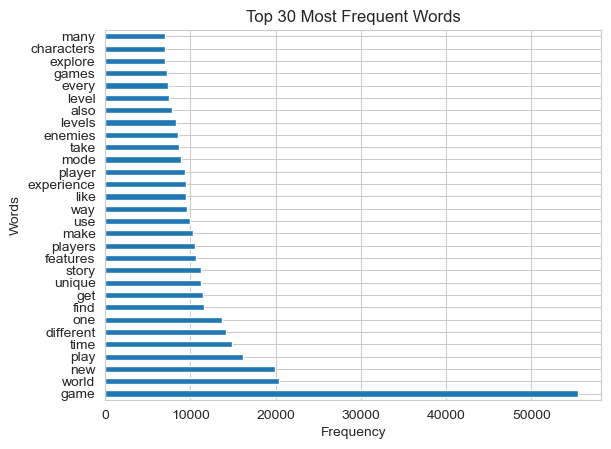

In [42]:
most_frq_words.head(30).plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 30 Most Frequent Words')
plt.show();

In the barchart above, we see the top 30 most frequent words that appear in our game descriptions. There are some words that seem to be meaningless and might confuse our model. We can look into removing them after testing a baseline model. 

In [43]:
# Importing our ml libraries

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
# Allocating our y target variable
y = df2['success']


# Splitting our data for training and testing
x_train,x_test, y_train, y_test = train_test_split(text_df, y, test_size=0.25, random_state = 42, stratify=y)


In [ ]:
# Initiate the classifier
mnb_clf = MultinomialNB()

# Train the classifier on training data
mnb_clf.fit(x_train,y_train)

# Use the classifier to make predictions on test data
nb_pred = mnb_clf.predict(x_test)


In [ ]:
# Evaluating performance of model
print('Accuracy score using NB Classifier: ', accuracy_score(y_test, nb_pred))

nb_conf_matrix = confusion_matrix(y_test, nb_pred)

sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Prediction of Successful games using Multinomial Naive Bayes', fontdict = {'fontsize':12})
plt.show()

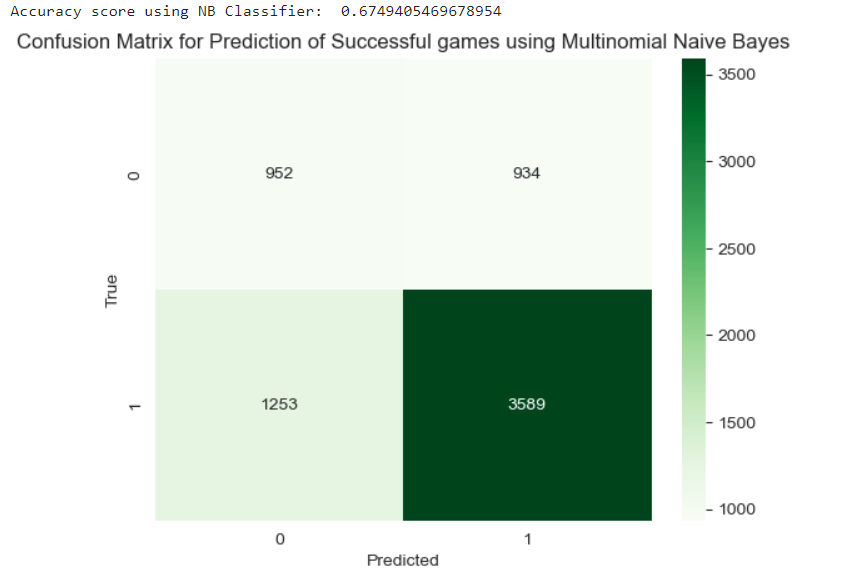

In [ ]:
# Print out model's classification report

nb_report = classification_report(y_test, nb_pred)
print(nb_report)


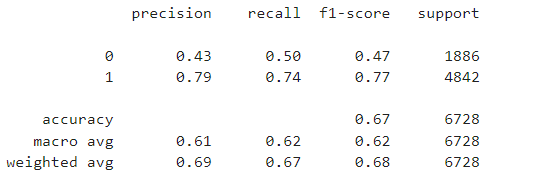

Our baseline model using a multinomial naive bayes classifier returns us; <br>
<br>
Precision score of 0.79. <br> We focus on precision score as for our business use case, we would want to first accurately target games that will be successful, and then minimising false positives. <br>
<br>


#### Lets try a random forest model. 

In [ ]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV

In [ ]:
#%%time

# Define the parameter grid
#param_grid = {'n_estimators': [10, 50, 100], 
              'max_depth': [None, 5, 10], 
              'min_samples_split': [2, 5, 10]}

# Create the random forest model
#rf = RandomForestClassifier()

# Create the grid search object
#grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search object to the data
#grid_search.fit(x_train, y_train)

# Print the best parameters and score
#print("Best parameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)


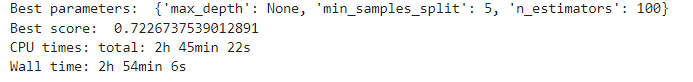

In [ ]:
### initiating random forest with best parameters

#best_rf = RandomForestClassifier(**grid_search.best_params_)

### Fitting model
#best_rf.fit(x_train,y_train)

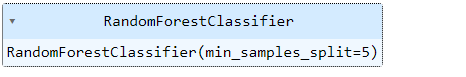

In [ ]:
#rf_pred = best_rf.predict(x_test)

In [ ]:
# Evaluating performance of model
#print('Accuracy score using Random Forest: ', accuracy_score(y_test, rf_pred))

#nb_conf_matrix = confusion_matrix(y_test, rf_pred)

#sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Greens')
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.title('Confusion Matrix for Prediction of Successful games using Random Forest', fontdict = {'fontsize':12})
#plt.show()

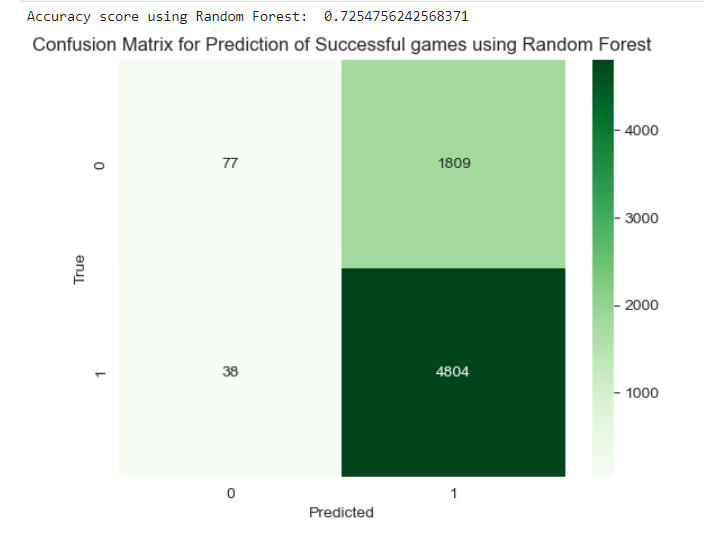

In [ ]:
# Assume y_test and y_pred are your true labels and predicted labels respectively

#rf_report = classification_report(y_test, rf_pred)
#print(rf_report)

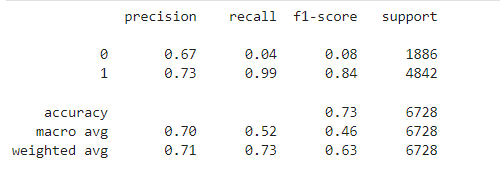

Our random forest model is not a good one as there is a high number of false positives, which will cause the business to incur unnecessary investment costs. 

In [ ]:
#from sklearn import svm

# Create an SVM classifier using the "rbf" kernel
#svm_clf = svm.SVC(kernel='rbf')

# Fit the classifier to the training data
#svm_clf.fit(x_train, y_train)

# Predict labels for the test data
#svm_pred = svm_clf.predict(x_test)


In [ ]:
# Evaluating performance of model
#print('Accuracy score using Random Forest: ', accuracy_score(y_test, svm_pred))

#svm_conf_matrix = confusion_matrix(y_test, svm_pred)

#sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Greens')
#plt.xlabel('Predicted')
#plt.ylabel('True')
#plt.title('Confusion Matrix for Prediction of Successful games using SVM', fontdict = {'fontsize':12})
#plt.show()

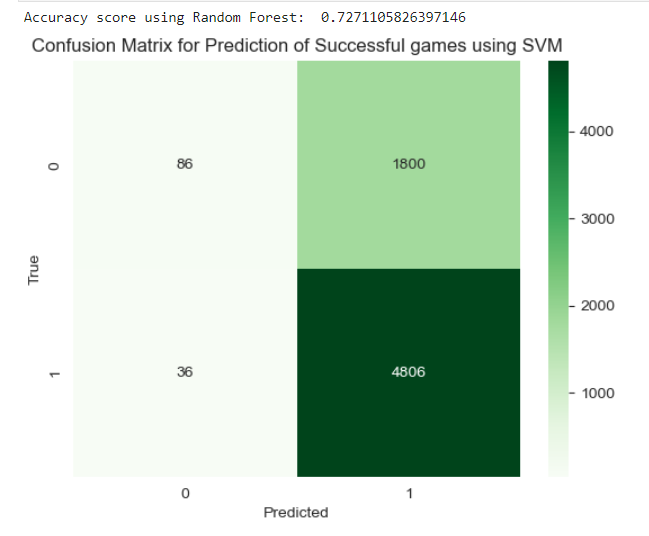

In [ ]:
#svm_report = classification_report(y_test, svm_pred)
#print(svm_report)

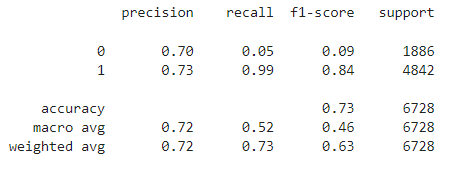

We see a similar result from the svm as well, it has too high a range of False Positive. Comparing between the 3 models from above, the Multinomial Naive Bayes provides us with the best score suited to our business use case, hence we will go forward with the naive bayes classifier for our actual modelling. 
<br><br>


# Improving Our Model

We have shortlisted the multinomial naive bayes classifier for our problem statement and we will now attempt to refine it with the introduction of new parameters. <br><br>

We will first filter out games that has less than 50 total reviews to try to reduce model confusion. We will also create a new column 'success' to use as our target variable.

In [50]:
# Filtering out games that has less than 50 total reviews in an attempt to improve model prediction

df3 = df2[df2['total_reviews']>=50]
df3

,title,r_date,price,description,review_type,review_stats,positive_percentage,total_reviews,tagged,game_id,r_year,success
0,persona 3 portable,2023-01-18,27.99,"experience the iconic, critically acclaimed rp...",mostly positive(771),74% of the 771 user reviews for this game are...,74,771,"rpg, story rich, anime, turn-based combat, jrp...",1809700,2023,1
2,fraymakers,2023-01-18,22.79,what is fraymakers?fraymakers is the ultimate ...,mixed(214),68% of the 214 user reviews for this game are...,68,214,"indie, fighting, 2d fighter, multiplayer, acti...",1420350,2023,0
7,osiris: new dawn,2023-01-18,39.99,"inspired by the edgier side of sci fi, osiris:...",mostly negative(127),31% of the 127 user reviews in the last 30 da...,31,127,"open world survival craft, horror, survival, s...",402710,2023,0
19,definitely not fried chicken,2023-01-18,28.99,"definitely not fried chicken - ""for all your l...",mostly positive(101),77% of the 101 user reviews for this game are...,77,101,"early access, simulation, management, sandbox,...",1036240,2023,1
34,the bad kids,2023-01-17,11.00,game instructionas an adaptation of the popula...,mostly positive(139),74% of the 139 user reviews for this game are...,74,139,"adventure, indie, puzzle, psychological horror...",2071200,2023,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,intelligent design: an evolutionary sandbox,2017-05-12,8.99,"in a universe driven by targets, a faceless co...",mixed(92),53% of the 92 user reviews for this game are ...,53,92,"idler, colony sim, education, sandbox, managem...",627620,2017,0
49985,ovivo,2017-05-12,5.69,ovivo is a metaphoric game filled with illusio...,very positive(391),90% of the 391 user reviews for this game are...,90,391,"indie, adventure, platformer, minimalist, 2d, ...",597700,2017,1
49991,"the end o,,,o",2017-05-12,0.00,a short game about the day things got weird. y...,mixed(180),65% of the 180 user reviews for this game are...,65,180,"indie, minimalist, stylized, horror, atmospher...",509880,2017,0
49992,plasma puncher,2017-05-12,6.69,"the life of a white blood cell ain't easy, esp...",very positive(57),91% of the 57 user reviews for this game are ...,91,57,"beat 'em up, action, casual, indie, action-adv...",602070,2017,1


This yields us a dataset of 10k games to train our model, which should be sufficient since there's only about 5k games released per year as of 2022. <br><br>

In [51]:
# creating a new column to label the game as successful if positive review is more than 70%

df3['success'] = np.where(df3['positive_percentage']>=70,1,0)
df3.head()

C:\Users\benyo\AppData\Local\Temp\ipykernel_24664\2328298651.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['success'] = np.where(df3['positive_percentage']>=70,1,0)


,title,r_date,price,description,review_type,review_stats,positive_percentage,total_reviews,tagged,game_id,r_year,success
0,persona 3 portable,2023-01-18,27.99,"experience the iconic, critically acclaimed rp...",mostly positive(771),74% of the 771 user reviews for this game are...,74,771,"rpg, story rich, anime, turn-based combat, jrp...",1809700,2023,1
2,fraymakers,2023-01-18,22.79,what is fraymakers?fraymakers is the ultimate ...,mixed(214),68% of the 214 user reviews for this game are...,68,214,"indie, fighting, 2d fighter, multiplayer, acti...",1420350,2023,0
7,osiris: new dawn,2023-01-18,39.99,"inspired by the edgier side of sci fi, osiris:...",mostly negative(127),31% of the 127 user reviews in the last 30 da...,31,127,"open world survival craft, horror, survival, s...",402710,2023,0
19,definitely not fried chicken,2023-01-18,28.99,"definitely not fried chicken - ""for all your l...",mostly positive(101),77% of the 101 user reviews for this game are...,77,101,"early access, simulation, management, sandbox,...",1036240,2023,1
34,the bad kids,2023-01-17,11.00,game instructionas an adaptation of the popula...,mostly positive(139),74% of the 139 user reviews for this game are...,74,139,"adventure, indie, puzzle, psychological horror...",2071200,2023,1


In [55]:
df3['success'].value_counts()

1    7754
0    2263
Name: success, dtype: int64

In [54]:
df3['success'].value_counts(normalize=True)

1    0.774084
0    0.225916
Name: success, dtype: float64

With the threshold set at 70% positive reviews, there are 7754 games that can be considered successful. Our dataset is also imbalanced (77% positive vs 23% negative).

## Lemmatization

<br>We will also perform lemmatization to reduce the number of features and processing time by using the spaCy nlp model.  

In [58]:
!pip install spacy

     --------------------------------------- 12.6/12.6 MB 16.4 MB/s eta 0:00:00
     ---------------------------------------- 48.9/48.9 kB ? eta 0:00:00
     ------------------------------------- 481.3/481.3 kB 15.2 MB/s eta 0:00:00
     ---------------------------------------- 96.7/96.7 kB ? eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 20.8 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 19.9 MB/s eta 0:00:00
     ------------------------------------- 181.6/181.6 kB 10.7 MB/s eta 0:00:00
     ---------------------------------------- 7.0/7.0 MB 22.5 MB/s eta 0:00:00


In [ ]:
%%time

import spacy

# Load the spacy model
nlp = spacy.load("en_core_web_sm")

# Define a function to perform lemmatization on a given text
def lemmatize_text(text):
    doc = nlp(text)
    lemmatized_text = [token.lemma_ for token in doc]
    return " ".join(lemmatized_text)


In [ ]:
%%time

# Apply the lemmatization function to the 'description' column
df3['description'] = df3['description'].apply(lemmatize_text)



<br>We will now vectorize our description text data, taking new parameters of using english bi-gram words only. As an avid gamer ourselves, we understand from our experience as buyers that when we purchase games we look at certain keywords, which mostly are in combination of 2 words, such as co-op, open world, turn based etc, hence we believe that bi-gram vectorizing would help our model perform better.

In [ ]:
%%time

# Initialize the CountVectorizer
cvec1 = CountVectorizer(stop_words=stopwords, max_features = 80000, token_pattern='[a-zA-Z]+', ngram_range=(2,2))

# Fit and transform the text data
text_data1 = cvec1.fit_transform(df3['description'])

# Create a new dataframe with the transformed text data
text_df1 = pd.DataFrame(text_data1.toarray(), columns=cvec1.get_feature_names_out())

<br> Let's take a look at some of the most common words that exists in our vectorized data. 

In [ ]:
most_frq_words = text_df1.sum().sort_values(ascending=False)

In [ ]:
plt.figure(figsize=(20,10))
most_frq_words.head(50).plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 50 Most Frequent Words')
plt.show();

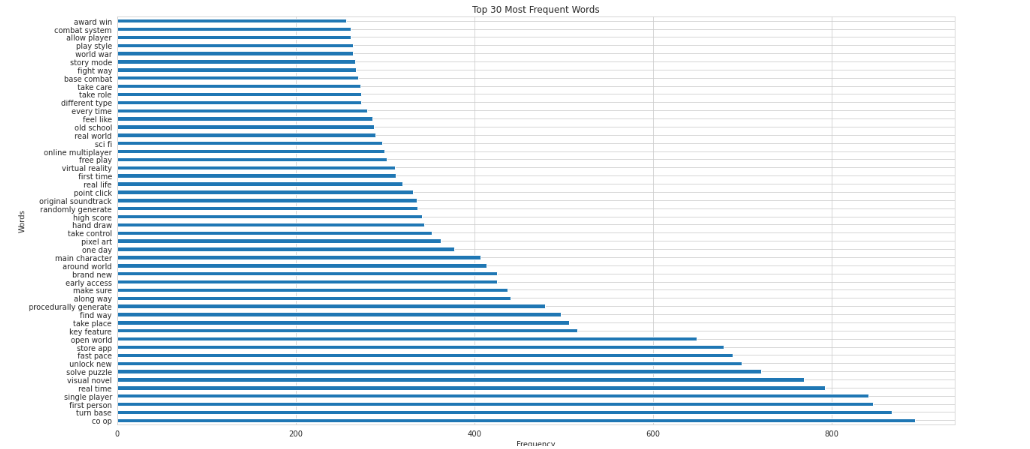

Seems like there are some common words that rank high that makes sense, perhaps turn-based, real-time, first person and co-op games are more popular. 

# Training & Fitting Our Model

With the preprocessing done, we can now train and fit our new model. As our dataset is imbalanced, we are choosing to tackle the issue with using Complement Naive Bayes *(basically just like multinomial naive bayes but deals with imbalanced data)*

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Defining our y target variable
y1 = df3['success']

# Train test split our data
x_train1,x_test1, y_train1, y_test1 = train_test_split(text_df1, y1, test_size=0.2, random_state = 42, stratify=y1)


In [ ]:
# Instantiate model
cnb = ComplementNB()

# Fit model
cnb.fit(x_train1, y_train1)

# Predict using fitted model
cnb_pred = cnb.predict(x_test1)

In [ ]:
# Evaluating performance of model
print('Accuracy score using CNB Classifier: ', accuracy_score(y_test1, cnb_pred))

cnb_conf_matrix = confusion_matrix(y_test1, cnb_pred)

sns.heatmap(cnb_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Prediction of Successful games using Complement Naive Bayes', fontdict = {'fontsize':12})
plt.show()

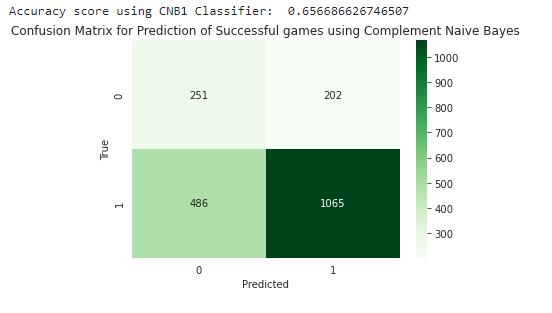

In [ ]:
cnb_report = classification_report(y_test1, cnb_pred)
print(cnb_report)

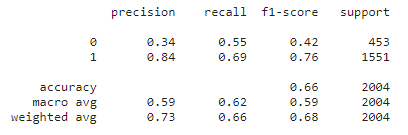

By introducing new parameters, we have been able to increase our precision score from 0.79 *(baseline model)* to 0.84 *(new model)* and also managed to bring down the ratio of False Positives, which is important in reducing investment mistake costs. 

# Conclusion

In our business use case, as there is only a finite amount of money that can be invested in a number of games, we have put dominance on evaluating our model with precision as we would want to accurately capture True Positives (successful games that will return the investments) as well as lowering the False Positives (to avoid wasting money on games that turn out to a flop) based on the description text of the games. As such, we are choosing to go ahead with our Complement Naive Bayes model with the current data that we possess. <br><br>
Further exploration and improvement can be done in future, and the following are some suggestions for the roadmap;

1) We realized that there is a trend in using images and videos/gifs instead of just plain text in the game descriptions, especially in triple A a.k.a big budget games, we can further explore on how we can analyze such data on top of plain text in future as well. We could use that information to gain more insights or even influence a success of an invested game at a later stage.

2) As our problem statement is to predict a game's success purely on their game description, our model's prediction is based only on a small dimension of our game data. Perhaps we can look into other data types of the game characteristics/features such as developer/publisher/system requirements etc and combine different models to get a better prediction. 
